In [31]:
import pandas as pd


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df = pd.read_csv('HR_comma_sep.csv')

In [34]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
df.shape

(14999, 10)

In [36]:
import matplotlib.pyplot as plt

In [37]:
y = df.left

In [38]:
x = df.drop('left', axis=1)

In [39]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


<AxesSubplot:xlabel='satisfaction_level'>

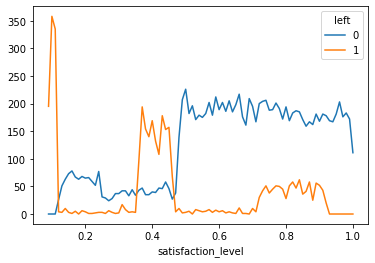

In [40]:
pd.crosstab(df.satisfaction_level,df.left).plot()

<AxesSubplot:xlabel='salary'>

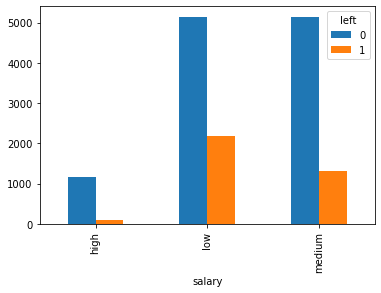

In [41]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

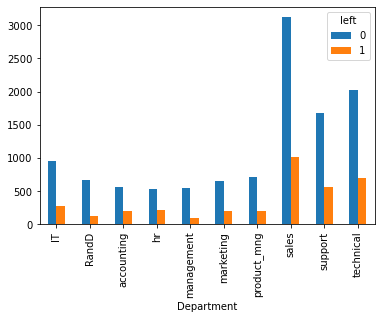

In [42]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [43]:
df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [44]:
salaries = pd.get_dummies(df.salary)

In [45]:
salaries = pd.concat([df,salaries], axis='columns')

In [46]:
salaries

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [47]:
salaries.drop('salary',axis='columns',inplace=True)

In [48]:
salaries

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [49]:
df = salaries

In [50]:
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [52]:
X =df
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3)

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [54]:
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
predictions =model.predict(X_test)

In [62]:
print('predictions', predictions[:10])
print(y_test[:10])


predictions [0 0 0 0 0 0 0 0 0 0]
5329     0
7003     0
13318    0
11610    0
2889     0
5910     0
9733     0
3780     0
12484    1
12474    1
Name: left, dtype: int64


In [63]:
model.score(X_test,y_test)

0.7732380952380953

In [64]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
7841,0.27,264,0,0,0,1
5997,0.63,155,0,0,1,0
13738,0.25,154,0,1,0,0
7275,0.60,147,0,0,1,0
5372,0.55,145,0,0,1,0
...,...,...,...,...,...,...
12958,0.93,192,0,1,0,0
12909,0.88,228,0,0,0,1
14556,0.10,278,0,1,0,0
270,0.44,127,0,0,0,1


In [65]:
y_train

7841     0
5997     0
13738    0
7275     0
5372     0
        ..
12958    0
12909    0
14556    1
270      1
971      1
Name: left, Length: 4499, dtype: int64

In [66]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
5329,0.81,236,0,0,0,1
7003,0.96,198,0,0,1,0
13318,0.87,165,0,1,0,0
11610,0.89,153,0,0,1,0
2889,0.96,214,0,0,1,0
...,...,...,...,...,...,...
10583,0.91,189,0,0,0,1
5426,0.77,142,0,0,1,0
11316,0.66,174,0,0,1,0
9154,0.68,267,0,0,0,1


In [68]:
y_test

5329     0
7003     0
13318    0
11610    0
2889     0
        ..
10583    0
5426     0
11316    0
9154     0
823      1
Name: left, Length: 10500, dtype: int64